In [1]:
from data import generate_dataset, sgd_FFNN, mse
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import seaborn as sns

n = 1000

x, y, y_noisy = generate_dataset(n=n, noise_std=0.5, random_state=1)

In [2]:
def ReLU(z):
    return np.where(z > 0, z, 0)

def dReLU(a):
    return np.where(a > 0, 1, 0)

def leaky_ReLU(z, alpha=0.01):
    return np.where(z > 0, z, alpha * z)

def dleaky_ReLU(a, alpha=0.01):
    return np.where(a > 0, 1, alpha)


Layers=0, nodes=5 -> Test MSE=0.30792
Layers=0, nodes=10 -> Test MSE=0.30792
Layers=0, nodes=25 -> Test MSE=0.30792
Layers=0, nodes=50 -> Test MSE=0.30792
Layers=0, nodes=100 -> Test MSE=0.30792
Layers=1, nodes=5 -> Test MSE=0.24679
Layers=1, nodes=10 -> Test MSE=0.24031
Layers=1, nodes=25 -> Test MSE=0.23920
Layers=1, nodes=50 -> Test MSE=0.23704
Layers=1, nodes=100 -> Test MSE=0.24363
Layers=2, nodes=5 -> Test MSE=0.23021
Layers=2, nodes=10 -> Test MSE=0.23766
Layers=2, nodes=25 -> Test MSE=0.23252
Layers=2, nodes=50 -> Test MSE=0.23624
Layers=2, nodes=100 -> Test MSE=0.23313
Layers=3, nodes=5 -> Test MSE=0.29646
Layers=3, nodes=10 -> Test MSE=0.22986
Layers=3, nodes=25 -> Test MSE=0.23136
Layers=3, nodes=50 -> Test MSE=0.23308
Layers=3, nodes=100 -> Test MSE=0.23062


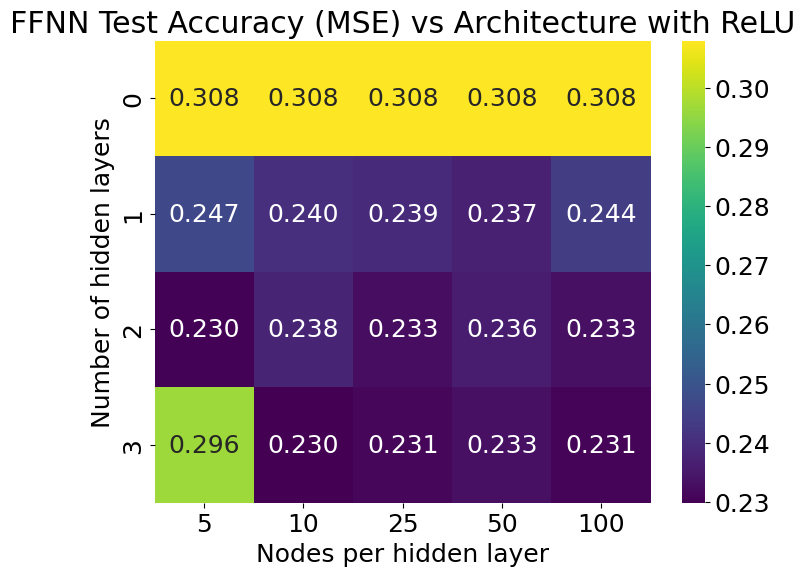

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y_noisy, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train.reshape(-1, 1))
x_test_scaled = scaler.transform(x_test.reshape(-1, 1))

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)


hidden_layers_list = [0, 1, 2, 3]
nodes_list = [5, 10, 25, 50, 100]

results = np.zeros((len(hidden_layers_list), len(nodes_list)))

for i, n_layers in enumerate(hidden_layers_list):
    for j, n_nodes in enumerate(nodes_list):
        # build layer structure dynamically
        if n_layers == 0:
            layers = [1, 1]              # no hidden layer = linear
        else:
            layers = [1] + [n_nodes]*n_layers + [1]
        
        # train network
        W, b, mse_tr, mse_te = sgd_FFNN(x_train_scaled, y_train, x_test_scaled, y_test, ReLU, dReLU,
                                        layers=layers, eta=0.01, num_steps=1500, seed=1)
        results[i, j] = mse_te[-1]  # store final test MSE
        print(f"Layers={n_layers}, nodes={n_nodes} -> Test MSE={mse_te[-1]:.5f}")


acc_matrix = results

# --- Plot heatmap ---
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6))
sns.heatmap(acc_matrix, annot=True, fmt=".3f", cmap="viridis",
            xticklabels=nodes_list, yticklabels=hidden_layers_list)
plt.xlabel("Nodes per hidden layer")
plt.ylabel("Number of hidden layers")
plt.title("FFNN Test Accuracy (MSE) vs Architecture with ReLU")
plt.show()


Layers=0, nodes=5 -> Test MSE=0.30792
Layers=0, nodes=10 -> Test MSE=0.30792
Layers=0, nodes=25 -> Test MSE=0.30792
Layers=0, nodes=50 -> Test MSE=0.30792
Layers=0, nodes=100 -> Test MSE=0.30792
Layers=1, nodes=5 -> Test MSE=0.24686
Layers=1, nodes=10 -> Test MSE=0.24065
Layers=1, nodes=25 -> Test MSE=0.23929
Layers=1, nodes=50 -> Test MSE=0.23724
Layers=1, nodes=100 -> Test MSE=0.24415
Layers=2, nodes=5 -> Test MSE=0.23098
Layers=2, nodes=10 -> Test MSE=0.23712
Layers=2, nodes=25 -> Test MSE=0.23262
Layers=2, nodes=50 -> Test MSE=0.23454
Layers=2, nodes=100 -> Test MSE=0.23313
Layers=3, nodes=5 -> Test MSE=0.23202
Layers=3, nodes=10 -> Test MSE=0.23124
Layers=3, nodes=25 -> Test MSE=0.23037
Layers=3, nodes=50 -> Test MSE=0.23271
Layers=3, nodes=100 -> Test MSE=0.23093


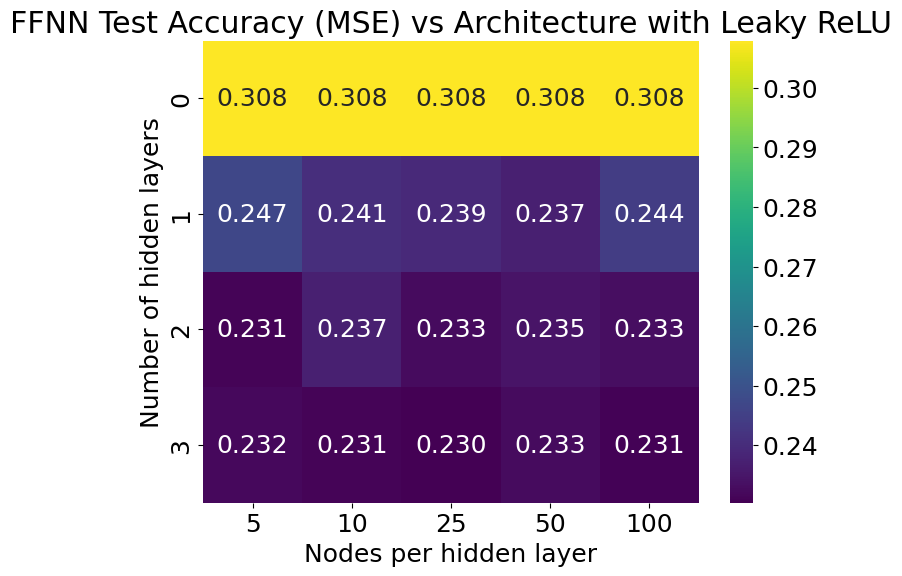

In [4]:


for i, n_layers in enumerate(hidden_layers_list):
    for j, n_nodes in enumerate(nodes_list):
        # build layer structure dynamically
        if n_layers == 0:
            layers = [1, 1]              # no hidden layer = linear
        else:
            layers = [1] + [n_nodes]*n_layers + [1]
        
        # train network
        W, b, mse_tr, mse_te = sgd_FFNN(x_train_scaled, y_train, x_test_scaled, y_test, leaky_ReLU, dleaky_ReLU,
                                        layers=layers, eta=0.01, num_steps=1500, seed=1,)
        results[i, j] = mse_te[-1]  # store final test MSE
        print(f"Layers={n_layers}, nodes={n_nodes} -> Test MSE={mse_te[-1]:.5f}")


acc_matrix = results

# --- Plot heatmap ---
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8,6))
sns.heatmap(acc_matrix, annot=True, fmt=".3f", cmap="viridis",
            xticklabels=nodes_list, yticklabels=hidden_layers_list)
plt.xlabel("Nodes per hidden layer")
plt.ylabel("Number of hidden layers")
plt.title("FFNN Test Accuracy (MSE) vs Architecture with Leaky ReLU")
plt.show()
